In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# # define physics equations

# v = d/t

# a = (v_f-v_i)/t

# # dr. vit
# d = v_i*t + 0.5*a * t**2

# # the TAD
# v_f**2 = v_i**2 + 2*a*d

# A_y = A*np.sin(theta)
# A_x = A*np.cos(theta)

In [3]:
# distance formula 
def dr_vit(t, coeffs):
    """
    Returns total displacement based on initial conditions. Assumes constant coefficients.
    
    Parameters:
        t (float): relative path to the directory with folders containing images
        coeffs (list): integers specifying the coefficients of the kinematics equation

    Returns:
        d (float): final displacement at time t, includes initial displacement specified in coeffs[0]
    """
    
    d = 0
    
    for n in range(len(coeffs)):
        c = coeffs[n]
        
        d += c/np.math.factorial(n) * t**n
        
    return d
        

In [48]:
# define example times
time = np.linspace(0, 10, 50)

# define physical coefficients
coeffs = [1, 0, 1]


# find distances correstponding to coefficients at each specified time
distance = []

for t in time:
    distance.append(dr_vit(t, coeffs))

In [49]:
distance[0]

1.0

Text(0, 0.5, 'Distance (m)')

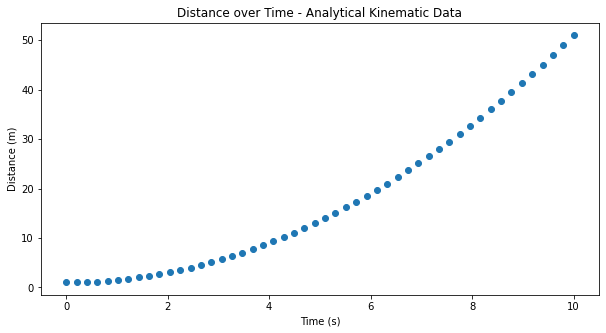

In [61]:
figsize=(10, 5)

fig, ax = plt.subplots(figsize=figsize)

ax.scatter(time, distance)

plt.title('Distance over Time - Analytical Kinematic Data')
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')

In [66]:
from random import random

In [76]:
str(random())

'0.7736090979825438'

## Compute Regression

In [51]:
# machine learning imports
# to split your data in order to get an accurate model
from sklearn.model_selection import train_test_split
# models to assess your data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [52]:
df = pd.DataFrame(distance, time).reset_index()
df.columns = ['time', 'distance']
df.head()

,time,distance
0,0.000000,1.000000
1,0.204082,1.020825
2,0.408163,1.083299
3,0.612245,1.187422
4,0.816327,1.333195


In [53]:
df.corr()

,time,distance
time,1.000000,0.967051
distance,0.967051,1.000000


In [56]:
# separate predictor and target
x = df['time']
y = df['distance']

predictor = x.values.reshape(-1, 1)
target = y